# Cargando las librerias requeridas

In [105]:
import numpy as np
import pandas as pd
from plotnine import *

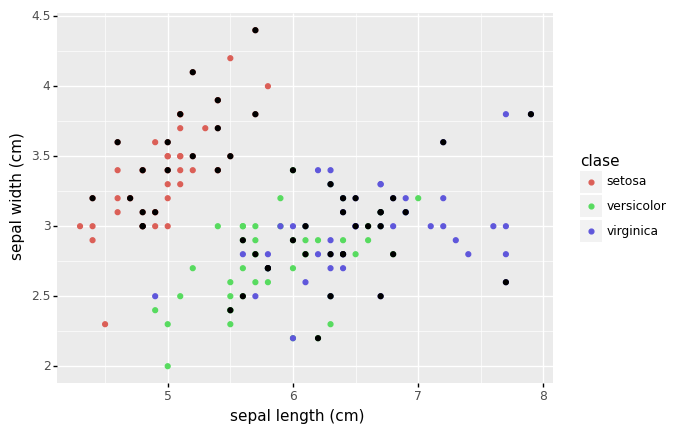

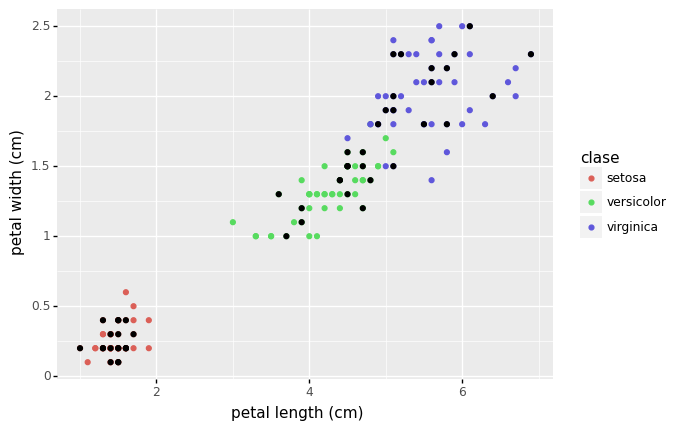

In [106]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris() #Cargando el dataset de la flor de iris
tempDF=pd.DataFrame(iris.data,columns=iris.feature_names)
tempDF['clase']=iris.target_names[iris.target]

X_train, X_test, y_train, y_test = train_test_split(iris.data,iris.target, test_size=0.33, random_state=42)

testData=pd.DataFrame(X_test,columns=iris.feature_names)
testData["Labels"]=y_test
print(ggplot(tempDF)+aes(x="sepal length (cm)", y="sepal width (cm)",color="clase")+ geom_point()+geom_point(data=testData,color="black"))

print(ggplot(tempDF)+aes(x="petal length (cm)", y="petal width (cm)",color="clase")
 +geom_point()+geom_point(data=testData,color="black"))




# Clase DecisionTreeClassifier

La clase DecisionTreeClassifier del módulo sklearn.tree nos permite implementar un árbol de decisión<br>
DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0)<br>
Parámetros
* criterion: función de score para la generación del árbol, puede ser "gini" o "entropy".<br>
* splitter: forma de selección de variable. “best” implica la mejor selección según el score, “random” elige una variable en forma aleatoria (para la implementación del modelo de Hunt).
* max_depth: valor entero, indicando la máxima profundidad del árbol.
* min_samples_split: valor entero, número mínimo de puntos para separar un nodo. En caso de un valor float se considera como la proporción de los datos.
* min_samples_leaf: valor entero, número mínimo de puntos que tiene que tener una hoja. En caso de un valor float se considera como la proporción de los datos.
* max_features: valor entero, número máximo de variables a considerar cuando se evalua la separación de un nodo.
* random_state: semilla para replicar un experimento
* max_leaf_nodes: valor entero indicando el número máximo de nodos hojas.
* min_impurity_decrease: valor float. Un nodo se separará si solo si el grado de impureza disminuye más que el valor definido.<br> El grado de impureza se define como: N_t / N * (impurity - N_t_R / N_t * right_impurity- N_t_L / N_t * left_impurity).<br> donde N, N_t, N_t_l, y N_t_r son el número de muestras totales, del nodo, del hijo izquierdo, y del hijo derecho, respectivamente.<br>

<br>Atributos
* classes_: las etiquetas de las clases.
* feature_importances_: importancia de las variables.
* tree_: el árbol generado<br>

<br>métodos/funciones
* fit(X, y): "Entrenamiento" del modelo, se tiene que dar los datos y la clase Y
* predict(X): predice las etiquetas para los puntos dados
* predict_proba(X): predice las probabilidades de las clases para los puntos dados
* predict_log_proba(X): predice el logaritmo de las probabilidades de las clases para los puntos dados (mayor estabilidad)

In [107]:
#Creando un árbol de decisión con las condiciones iniciales
from sklearn.tree import DecisionTreeClassifier
AD = DecisionTreeClassifier(max_depth=10)
AD = AD.fit(X_train,y_train)

#Aplicando el modelo a otros datos
resultado=AD.predict(X_test)
print("Resultado de la predicción:\n",resultado)
print("Resultado original:\n",y_test)

# #Aplicando el modelo a otros datos
# resultado=AD.predict_proba(X_test)
# print("Resultado de la predicción:\n",resultado)

Resultado de la predicción:
 [1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 1 2 1 2]
Resultado original:
 [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2]


In [108]:
from sklearn import metrics as mt

print(mt.classification_report(y_test,AD.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



# Interpretando el árbol
El árbol de decisión es sumamente sencillo de interpretar, basta con observar el árbol y la variable feature_importances_.<br>
feature_importances_ se calcula como la reducción (normalizada, para que la suma sea 1.0) de la reducción de la función de score para esa variable.

In [109]:
print(iris.feature_names)
print("importancia de las variables:\n",AD.feature_importances_)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
importancia de las variables:
 [0.01256535 0.02915555 0.05981177 0.89846733]


# Visualización del árbol
Para visualizar el árbol se utilizará la función plot_tree del módulo sklearn.tree.<br>
plot_tree(decision_tree, max_depth=None, feature_names=None, label='all', filled=False, impurity=True, precision=3, fontsize=None)<br>
Parámetros
* decision_tree: el árbol de decisión a mostrar
* max_depth: valor entero, profundidad máxima a mostrar del árbol de decisión
* feature_names: lista de string con los nombres a mostrar de las variables (caso contrario se muestra “X[0]”, “X[1]”, …)
* label: para mostrar la impuridad de los nodos ‘all’ (todos los nodos), ‘root’ (la raíz), ‘none’ (ninguno)
* filled: valor booleano, si es verdadero se colorea el árbol basado en el número de puntos que pertenecen a la clase
* impurity: valor booleano, si se muestra la impuridad de cada nodo
* precision: valor entero, número de dígitos para la precisión
* fontsize: valor entero, tamaño de la letra

## Atención, por definición del módulo, la rama izquierda corresponde al valor True.

Colores: Naranja = 0 ('setosa'), Verde = 1 ('versicolor'), Violeta=2 ('virginica')

importancia de las variables:
 [0.01256535 0.02915555 0.05981177 0.89846733]


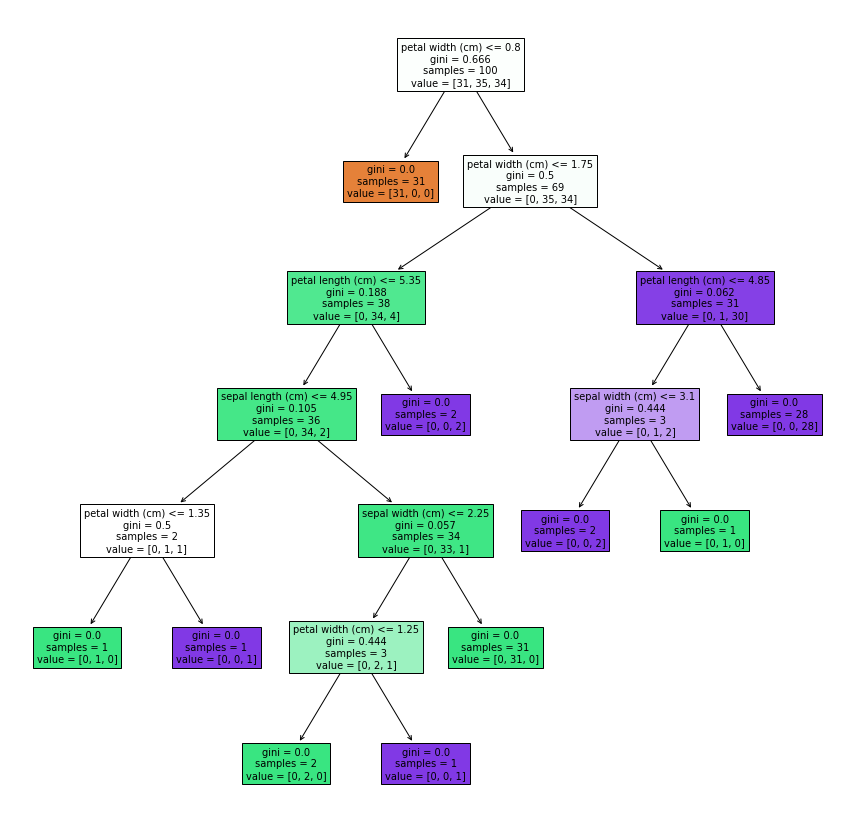

In [112]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15)) #definiendo el tamaño de la figura
print("importancia de las variables:\n",AD.feature_importances_)
plot_tree(AD,filled=True,feature_names=iris.feature_names)
plt.show() #mostrando el árbol

/usr/local/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
<ipython-input-113-b68d5f9c9eae>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


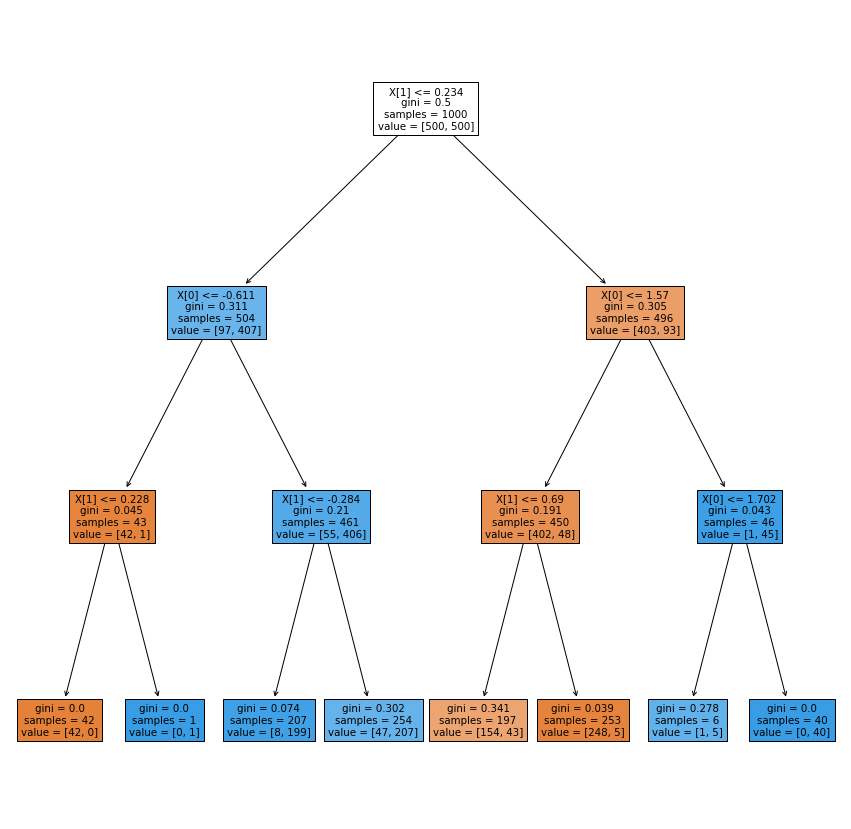

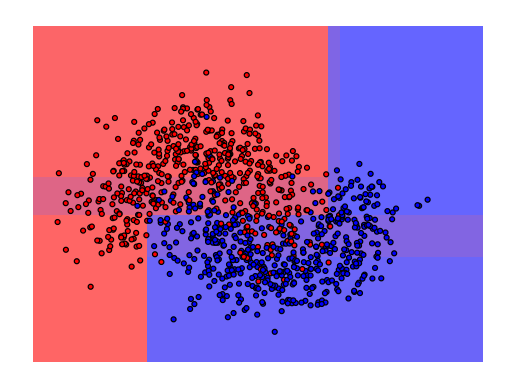

In [113]:
#Visualización del árbol
#Generando dos lunas
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_moons
tempData=make_moons(n_samples=1000,shuffle=True, noise=0.3, random_state=None)
tempData[1]
tempData[0][:,0]=tempData[0][:,0]
tempData[0][:,1]=tempData[0][:,1]

#Entrenando el modelo y aplicando a una grilla de puntos para su visualización
AD = DecisionTreeClassifier(max_depth=3)
AD = AD.fit(tempData[0],tempData[1])

#Creando una grilla de evaluación
x = np.arange(-2.0, 3.5, 0.05)
y = np.arange(-1.5, 2.5, 0.05)
temp = np.meshgrid(x, y)
dataTest=pd.DataFrame(temp[0].flatten(),columns=["X1"])
dataTest.insert(1,"X2",temp[1].flatten())

#Prediciendo y graficando el output
estimatedProbs=AD.predict_proba(dataTest.iloc[:,0:2])

#Creando el dataframe a graficar
output=(((1-estimatedProbs[:,0])*255).astype("int"))
dataTest.insert(2, "ClassOutput", "0")
for i in range(dataTest.shape[0]):
    dataTest.ClassOutput[i]='#%02x%02x%02x' % (255-output[i],0,output[i])

#Colores para los puntos originales
colorData=pd.DataFrame(list(map(str,tempData[1])),columns=["colorClass"])
colorData.colorClass[colorData.colorClass=="0"]="Red"
colorData.colorClass[colorData.colorClass=="1"]="Blue"
    
plt.figure(figsize=(15,15)) #definiendo el tamaño de la figura
plot_tree(AD,filled=True)
plt.show() #mostrando el árbol

# Generating the plot with ggplot/plotnine
tempDF=pd.DataFrame(tempData[0],columns=["X1","X2"])
pp=(ggplot()+aes(x="X1",y="X2")+theme_void()
  +geom_tile(data=dataTest,alpha=0.6,show_legend=False,fill=dataTest.ClassOutput)
  +geom_point(data=tempDF,show_legend=False,color="black",fill=colorData)
)
print(pp)

In [114]:
# Wine

In [115]:
from sklearn.datasets import load_wine
data = load_wine()

In [116]:
dataDF = pd.DataFrame(data['data'], columns=data['feature_names'])
dataDF

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [117]:
targetDF = pd.DataFrame(data['target'])

In [118]:
X_train, X_test, y_train, y_test = train_test_split(dataDF,targetDF, test_size=0.33, random_state=42)



In [119]:
#Creando un árbol de decisión con las condiciones iniciales
from sklearn.tree import DecisionTreeClassifier
AD = DecisionTreeClassifier()
AD = AD.fit(X_train,y_train)

#Aplicando el modelo a otros datos
# resultado=AD.predict(X_test)
# print("Resultado de la predicción:\n",resultado)
# print("Resultado original:\n",y_test)

# #Aplicando el modelo a otros datos
# resultado=AD.predict_proba(X_test)
# print("Resultado de la predicción:\n",resultado)

In [120]:
from sklearn import metrics as mt

print(mt.classification_report(y_test,AD.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92        20
           1       0.92      1.00      0.96        24
           2       1.00      0.93      0.97        15

    accuracy                           0.95        59
   macro avg       0.96      0.94      0.95        59
weighted avg       0.95      0.95      0.95        59



importancia de las variables:
 [0.02183687 0.         0.02486976 0.         0.         0.
 0.41855886 0.         0.         0.40132932 0.         0.02371303
 0.10969216]


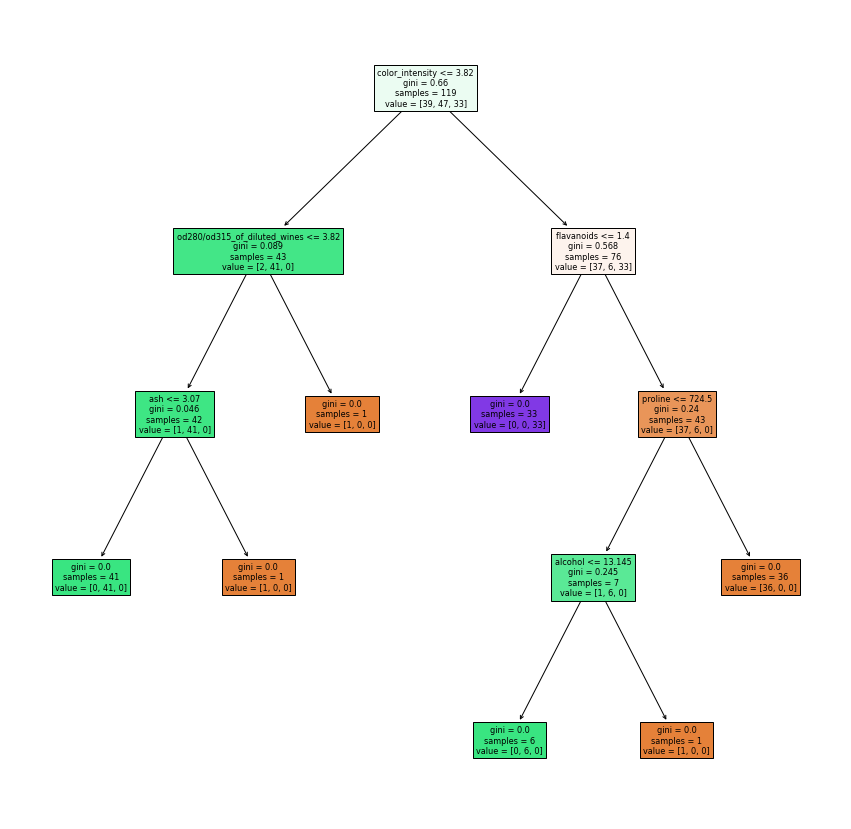

In [121]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15)) #definiendo el tamaño de la figura
print("importancia de las variables:\n",AD.feature_importances_)
plot_tree(AD,filled=True,feature_names=dataDF.columns)
plt.show() #mostrando el árbol

In [122]:
#Creando un árbol de decisión con las condiciones iniciales
from sklearn.tree import DecisionTreeClassifier


from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold


kf = KFold(n_splits=10)
AD = DecisionTreeClassifier(max_depth=10)
results = cross_validate(AD, dataDF,targetDF, cv=kf, return_train_score=True)

print("score del modelo para training: ",results['train_score'].mean(),"+-",results['train_score'].std())
print("score del modelo para test: ",results['test_score'].mean(),"+-",results['test_score'].std())
    

score del modelo para training:  1.0 +- 0.0
score del modelo para test:  0.8545751633986928 +- 0.09636090705994409


In [123]:
res = pd.DataFrame(columns=['depth','tipo','mean','std'])
for k in range(1,10):
    AD = DecisionTreeClassifier(max_depth=k)
    results = cross_validate(AD, dataDF,targetDF, cv=kf, return_train_score=True)
    res.loc[len(res)] = [k,'train',results['train_score'].mean(),results['train_score'].std()]
    res.loc[len(res)] = [k,'test',results['test_score'].mean(),results['test_score'].std()]



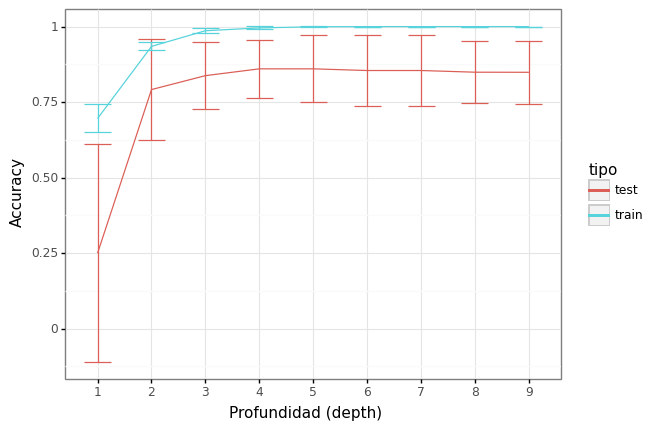

<ggplot: (330812823)>

In [124]:
(ggplot(res)+
 aes(x="depth",y="mean",ymin="mean-std",ymax="mean+std", group='tipo',color='tipo')+
 geom_line()+
 geom_errorbar()+ 
 labs(x="Profundidad (depth)",y="Accuracy")+
 theme_bw()
)



# Datos categoricos

Para aplicar un árbol de decisión sobre datos categóricos es necesario transformar las variables utilizando one hot encoding. Recuerden, one hot encoding transforma una variable de x valores en x variables binarias (una por valor) o x-1 variables binarias (la ausencia de todas las variables indican la presencia de un valor). <br>
La clase OneHotEncoder del módulo sklearn.preprocessing permite realizar este proceso en forma rápida
OneHotEncoder(drop=None,sparse=True)
Parámetro
* drop: método a utilizar para descartar uno de los valores.<br>
None: mantiene todos los valores.<br>
‘first’: bota el primer valor de una variable.<br>
‘if_binary’: bota el primer valor de las variable binarias, y mantiene todos los valores en las otras variables.
* sparse: valor booleano indicando si se quiere devolver una matriz sparse (menos memoria, mala visualización)

<br>Atributos
* categories_: un arreglo con la lista de valores para cada categoría.
* drop_idx_: arreglo indicando el tipo de drop realizado para esa variable.

<br>métodos/funciones
* fit(X): "Entrenamiento" del modelo.
* fit_transform(X): aprende las variables y aplica la transformación.
* transform(X): transforma el set de datos X.
* inverse_transform(X): aplica la transformación inversa a los datos adquiridos.

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
#Leyendo los datos de banco
df = pd.read_csv('./data/bank.csv',sep=';')
df = df.iloc[:,[1,2,3,4,6,7,8,16]]
df

,job,marital,education,default,housing,loan,contact,y
0,unemployed,married,primary,no,no,no,cellular,no
1,services,married,secondary,no,yes,yes,cellular,no
2,management,single,tertiary,no,yes,no,cellular,no
3,management,married,tertiary,no,yes,yes,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,no
...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,no
4518,technician,married,secondary,no,no,no,cellular,no
4519,blue-collar,married,secondary,no,no,no,cellular,no


In [149]:
typeDrop="if_binary"
OHE = OneHotEncoder(sparse=False, drop='if_binary') 
tempDF= pd.DataFrame(OHE.fit_transform(df), columns=OHE.get_feature_names_out())
tempDF

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_cellular,contact_telephone,contact_unknown,y_yes
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4517,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
4518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4519,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [175]:
# from sklearn.utils.random import sample_without_replacement
# index = sample_without_replacement(np.sum(tempDF['y_yes']==0), 500)
# df2 = pd.concat([tempDF[tempDF['y_yes']==0].iloc[index], tempDF[tempDF['y_yes']==1]])

In [176]:
X_train, X_test, y_train, y_test = train_test_split(tempDF.iloc[:,:-1],tempDF.iloc[:,-1:], test_size=0.33, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(df2.iloc[:,:-1],df2.iloc[:,-1:], test_size=0.33, random_state=42)

In [177]:
#Creando un objeto Arbol de decisión con las condiciones iniciales
from sklearn import metrics as mt
from sklearn.tree import DecisionTreeClassifier
AD = DecisionTreeClassifier()
AD = AD.fit(X_train,y_train)

resultado=AD.predict(X_test)


print(mt.classification_report(y_test,AD.predict(X_test)))


              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93      1334
         1.0       0.07      0.01      0.02       158

    accuracy                           0.88      1492
   macro avg       0.48      0.50      0.48      1492
weighted avg       0.81      0.88      0.84      1492



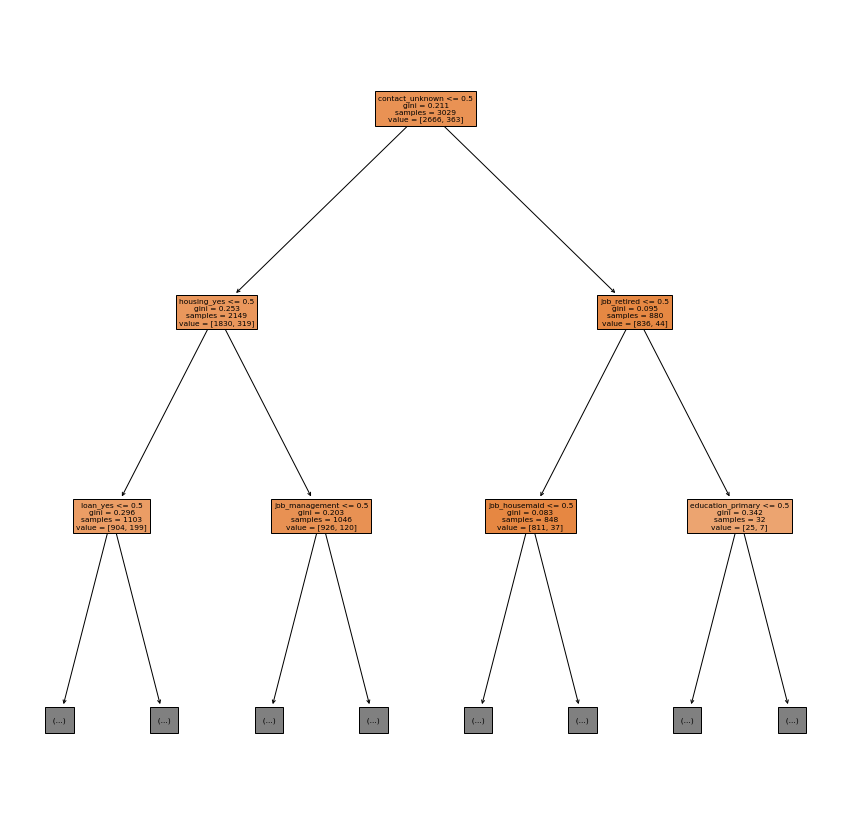

In [178]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15)) #definiendo el tamaño de la figura
plot_tree(AD,filled=True, max_depth=2, feature_names=tempDF.columns)
plt.show() #mostrando el árbol

In [179]:
AD.feature_importances_

array([0.01411639, 0.04247998, 0.01403677, 0.0151903 , 0.02547047,
       0.03210805, 0.03637308, 0.01437352, 0.01631729, 0.02782524,
       0.01626908, 0.01194085, 0.06698092, 0.03709971, 0.05634842,
       0.07746887, 0.0443522 , 0.05060711, 0.05795828, 0.04808387,
       0.07048559, 0.08314202, 0.01247517, 0.04625671, 0.08224011])

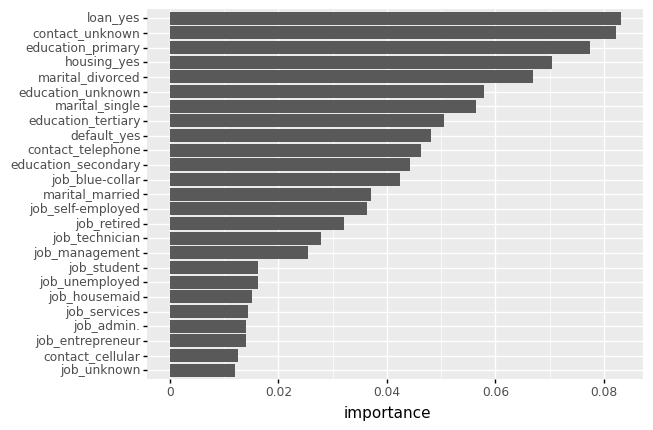

<ggplot: (333223807)>

In [180]:
importance = pd.DataFrame({'importance' : AD.feature_importances_}, index=tempDF.columns[:-1])
importance_order = importance.sort_values('importance', ascending=True).index.to_list()

ggplot(importance, aes(x=importance.index, y='importance'))\
+ scale_x_discrete(limits=importance_order)\
+ geom_col() + coord_flip()

